In [1]:
import pandas as pd
import ast

df = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/aug/predictions_replies_cardiffnlp_twitter-roberta-large-emotion-latest_merged.csv')


def parse_distribution(dist_str):

    dist_list = ast.literal_eval(dist_str)  
    return dict(dist_list)

df['parsed_11'] = df['roberta-large-predictions'].apply(parse_distribution)
df['parsed_6'] = df['mapped_predictions'].apply(parse_distribution)


In [3]:
df.head()

id      conversation_id                 created_at  \
0  1156746119180902400  1156745986548670465  2019-08-01 01:59:00+00:00   
1  1156746144963280896  1156745986548670465  2019-08-01 01:59:06+00:00   
2  1156746151435149312  1156745986548670465  2019-08-01 01:59:08+00:00   
3  1156746252362510337  1156745986548670465  2019-08-01 01:59:32+00:00   
4  1156746475994529797  1156745986548670465  2019-08-01 02:00:25+00:00   

                                             replies  \
0                           oh my god it totally was   
1                  before or after she does her hair   
2                                        we did that   
3                                       try exorcism   
4  i am very unsurprised that the times would lik...   

                                          tweet_text tweet_lang  \
0  Quote of the night? Gillibrand gets laughs say...         en   
1  Quote of the night? Gillibrand gets laughs say...         en   
2  Quote of the night? Gillibrand gets laughs say...         en   
3  Quote of the night? Gillibrand gets laughs say...         en   
4  Quote of the night? Gillibrand gets laughs say...         en   

   lang_confidence                          roberta-large-predictions  \
0         0.836091  [('joy', 0.48983749747276306), ('fear', 0.3266...   
1         0.836091  [('anticipation', 0.8642354607582092), ('surpr...   
2         0.836091  [('joy', 0.8022317886352539), ('optimism', 0.7...   
3         0.836091  [('anticipation', 0.2703830301761627), ('disgu...   
4         0.836091  [('disgust', 0.8016126155853271), ('surprise',...   

                                  mapped_predictions  \
0  [('anger', 0.08780127016028874), ('fear', 0.22...   
1  [('anger', 0.015570776389623047), ('fear', 0.0...   
2  [('anger', 0.007062669697876885), ('fear', 0.0...   
3  [('anger', 0.10408256350080972), ('fear', 0.18...   
4  [('anger', 0.1280327484074636), ('fear', 0.044...   

                                           parsed_11  \
0  {'joy': 0.48983749747276306, 'fear': 0.3266953...   
1  {'anticipation': 0.8642354607582092, 'surprise...   
2  {'joy': 0.8022317886352539, 'optimism': 0.7848...   
3  {'anticipation': 0.2703830301761627, 'disgust'...   
4  {'disgust': 0.8016126155853271, 'surprise': 0....   

                                            parsed_6  
0  {'anger': 0.08780127016028874, 'fear': 0.22526...  
1  {'anger': 0.015570776389623047, 'fear': 0.0438...  
2  {'anger': 0.007062669697876885, 'fear': 0.0038...  
3  {'anger': 0.10408256350080972, 'fear': 0.18674...  
4  {'anger': 0.1280327484074636, 'fear': 0.044025...

In [4]:
df_11 = pd.json_normalize(df['parsed_11'])
df_6  = pd.json_normalize(df['parsed_6'])


df_11.columns = [f"em_11_{col}" for col in df_11.columns] 
df_6.columns = [f"em_6_{col}" for col in df_6.columns]

df = pd.concat([df, df_11, df_6], axis=1)

In [5]:
df.head()

id      conversation_id                 created_at  \
0  1156746119180902400  1156745986548670465  2019-08-01 01:59:00+00:00   
1  1156746144963280896  1156745986548670465  2019-08-01 01:59:06+00:00   
2  1156746151435149312  1156745986548670465  2019-08-01 01:59:08+00:00   
3  1156746252362510337  1156745986548670465  2019-08-01 01:59:32+00:00   
4  1156746475994529797  1156745986548670465  2019-08-01 02:00:25+00:00   

                                             replies  \
0                           oh my god it totally was   
1                  before or after she does her hair   
2                                        we did that   
3                                       try exorcism   
4  i am very unsurprised that the times would lik...   

                                          tweet_text tweet_lang  \
0  Quote of the night? Gillibrand gets laughs say...         en   
1  Quote of the night? Gillibrand gets laughs say...         en   
2  Quote of the night? Gillibrand gets laughs say...         en   
3  Quote of the night? Gillibrand gets laughs say...         en   
4  Quote of the night? Gillibrand gets laughs say...         en   

   lang_confidence                          roberta-large-predictions  \
0         0.836091  [('joy', 0.48983749747276306), ('fear', 0.3266...   
1         0.836091  [('anticipation', 0.8642354607582092), ('surpr...   
2         0.836091  [('joy', 0.8022317886352539), ('optimism', 0.7...   
3         0.836091  [('anticipation', 0.2703830301761627), ('disgu...   
4         0.836091  [('disgust', 0.8016126155853271), ('surprise',...   

                                  mapped_predictions  \
0  [('anger', 0.08780127016028874), ('fear', 0.22...   
1  [('anger', 0.015570776389623047), ('fear', 0.0...   
2  [('anger', 0.007062669697876885), ('fear', 0.0...   
3  [('anger', 0.10408256350080972), ('fear', 0.18...   
4  [('anger', 0.1280327484074636), ('fear', 0.044...   

                                           parsed_11  ... em_11_sadness  \
0  {'joy': 0.48983749747276306, 'fear': 0.3266953...  ...      0.015008   
1  {'anticipation': 0.8642354607582092, 'surprise...  ...      0.028064   
2  {'joy': 0.8022317886352539, 'optimism': 0.7848...  ...      0.010967   
3  {'anticipation': 0.2703830301761627, 'disgust'...  ...      0.051996   
4  {'disgust': 0.8016126155853271, 'surprise': 0....  ...      0.102385   

   em_11_love  em_11_trust  em_11_pessimism  em_6_anger  em_6_fear  \
0    0.012099     0.011320         0.008996    0.087801   0.225264   
1    0.022123     0.052336         0.029001    0.015571   0.043880   
2    0.010680     0.063299         0.004591    0.007063   0.003846   
3    0.001529     0.008554         0.037528    0.104083   0.186749   
4    0.006554     0.037657         0.128637    0.128033   0.044026   

   em_6_surprise  em_6_disgust  em_6_sadness  em_6_joy  
0       0.235211      0.060365      0.010071  0.381288  
1       0.749457      0.036710      0.019832  0.134550  
2       0.133687      0.004530      0.005581  0.845294  
3       0.352360      0.239251      0.063753  0.053804  
4       0.393753      0.253838      0.032421  0.147929  

[5 rows x 28 columns]

In [6]:
# Summary of the 11-emotion columns
df_11_stats = df[[col for col in df.columns if col.startswith("em_11_")]].describe()
print(df_11_stats)

# Summary of the 6-emotion columns
df_6_stats = df[[col for col in df.columns if col.startswith("em_6_")]].describe()
print(df_6_stats)

          em_11_joy    em_11_fear  em_11_anticipation  em_11_surprise  \
count  51147.000000  51147.000000        51147.000000    51147.000000   
mean       0.223120      0.096168            0.271817        0.078886   
std        0.344465      0.206094            0.266829        0.145430   
min        0.000534      0.000626            0.007566        0.000722   
25%        0.008304      0.009032            0.051794        0.011634   
50%        0.028768      0.019190            0.164304        0.024961   
75%        0.273153      0.057945            0.434075        0.070280   
max        0.999122      0.998130            0.992846        0.996138   

        em_11_anger  em_11_disgust  em_11_optimism  em_11_sadness  \
count  51147.000000   51147.000000    51147.000000   51147.000000   
mean       0.381358       0.435637        0.272798       0.183666   
std        0.398394       0.394091        0.351254       0.239960   
min        0.000912       0.001658        0.001390       0.001646 

In [9]:
import matplotlib.pyplot as plt

em_11_cols = [col for col in df.columns if col.startswith("em_11_")]

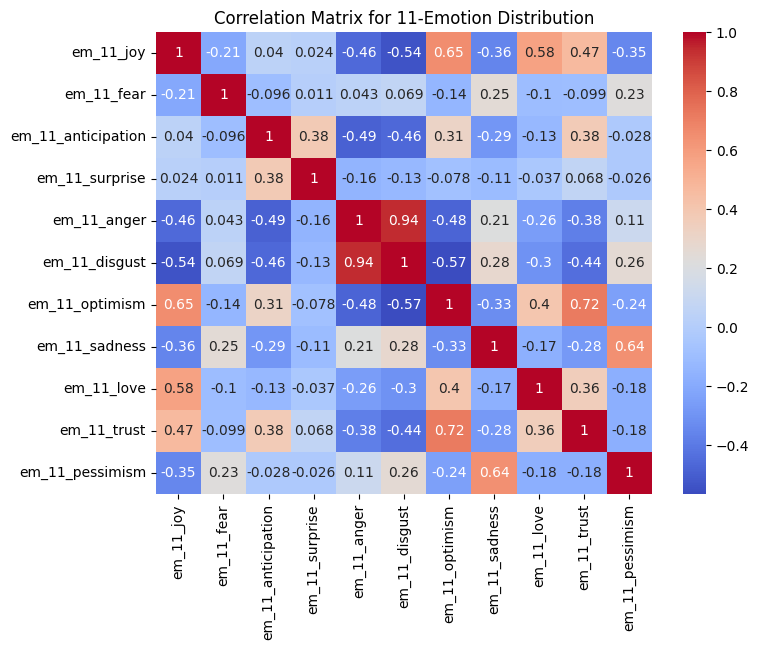

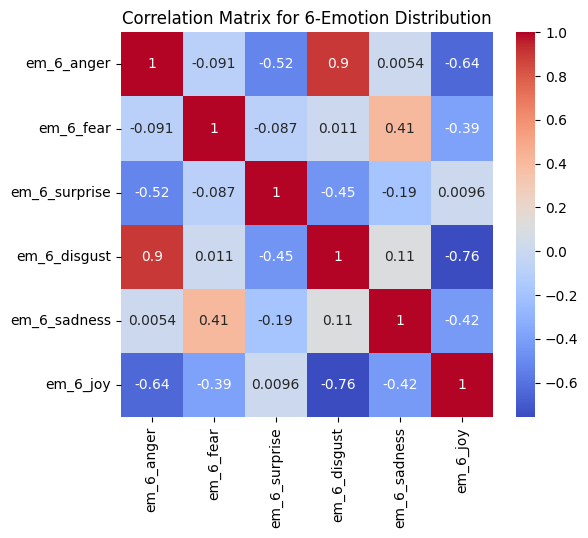

In [10]:
corr_11 = df[em_11_cols].corr()
corr_6 = df[[col for col in df.columns if col.startswith("em_6_")]].corr()

import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_11, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for 11-Emotion Distribution")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(corr_6, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for 6-Emotion Distribution")
plt.show()

In [55]:
import pandas as pd
import ast

replies_df = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/aug/predictions_replies_cardiffnlp_twitter-roberta-large-emotion-latest_merged.csv')
tweets_df = pd.read_csv("/work/ptyagi/masterthesis/data/predictions/aug/averaged_predictions.csv")

def parse_distribution(dist_str):
    return dict(ast.literal_eval(dist_str))

replies_df['label_distribution'] = replies_df['mapped_predictions'].apply(parse_distribution)
tweets_df['tweet_distribution'] = tweets_df['mapped_predictions'].apply(parse_distribution)
tweets_df['average_reply_distribution'] = tweets_df['averaged_predictions'].apply(parse_distribution)
tweets_df['clip_distribution'] = tweets_df['clip_predictions'].apply(parse_distribution)

In [56]:
def average_distributions(row):
    dist_1 = row['tweet_distribution']
    dist_2 = row['clip_distribution']
    avg_dist = {key: (dist_1[key] + dist_2[key]) / 2 for key in dist_1}
    return avg_dist
tweets_df['clip_tweet_dist'] = tweets_df.apply(average_distributions, axis=1)

In [57]:
from scipy.spatial.distance import jensenshannon

def compute_jsd(tweet_dist, reply_dist):
    tweet_probs = list(tweet_dist.values())
    reply_probs = list(reply_dist.values())
    return jensenshannon(tweet_probs, reply_probs, base=2)


In [58]:
tweets_df['jsd'] = tweets_df.apply(lambda row: compute_jsd(row['tweet_distribution'], row['average_reply_distribution']), axis=1)
tweets_df['jsd_image'] = tweets_df.apply(lambda row: compute_jsd(row['tweet_distribution'], row['clip_distribution']), axis=1)
tweets_df['jsd_multi'] = tweets_df.apply(lambda row: compute_jsd(row['clip_tweet_dist'], row['average_reply_distribution']), axis=1)

In [59]:
high_jsd_tweets = tweets_df[tweets_df['jsd'] > 0.7]


In [60]:
high_jsd_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 1 to 7344
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   conversation_id                  810 non-null    int64  
 1   tweet_text                       810 non-null    object 
 2   roberta-large-predictions        810 non-null    object 
 3   averaged_predictions             810 non-null    object 
 4   mapped_predictions               810 non-null    object 
 5   cosine_similarity_tweet_replies  810 non-null    float64
 6   clip_predictions                 810 non-null    object 
 7   cosine_similarity_clip_replies   810 non-null    float64
 8   cosine_similarity_clip_tweet     810 non-null    float64
 9   similarity_bin                   810 non-null    object 
 10  matched_filename                 810 non-null    object 
 11  tweet_distribution               810 non-null    object 
 12  average_reply_distribution

In [61]:
high_jsd_tweets.head()

conversation_id                                         tweet_text  \
1    1156756706296238081  Is climate change a massive hoax or not?  Whic...   
3    1156786644906840064  ICYMI: Trump Slaps #Tariffs on Solar Panels in...   
33   1156838727068659712  As a national or subnational government, you c...   
45   1156830275868844034  Each of us hold the power to save the world.On...   
104  1156886201909108736  Hey [USER] creatives - we're recruiting right ...   

                             roberta-large-predictions  \
1    [('anticipation', 0.679983913898468), ('surpri...   
3    [('anger', 0.8689755201339722), ('disgust', 0....   
33   [('optimism', 0.9910923838615417), ('anticipat...   
45   [('optimism', 0.9930724501609802), ('joy', 0.7...   
104  [('optimism', 0.9242421984672546), ('anticipat...   

                                  averaged_predictions  \
1    [('anger', 0.2943476886939764), ('fear', 0.109...   
3    [('anger', 0.008867843414662797), ('fear', 0.0...   
33   [('anger', 0.23401623043659292), ('fear', 0.16...   
45   [('anger', 0.3587089065909326), ('fear', 0.075...   
104  [('anger', 0.4202418867845155), ('fear', 0.059...   

                                    mapped_predictions  \
1    [('anger', 0.03949322766488157), ('fear', 0.09...   
3    [('anger', 0.4027862404695535), ('fear', 0.023...   
33   [('anger', 0.0073488631996167925), ('fear', 0....   
45   [('anger', 0.003593141767274418), ('fear', 0.0...   
104  [('anger', 0.004276055698132293), ('fear', 0.0...   

     cosine_similarity_tweet_replies  \
1                           0.238486   
3                           0.082587   
33                          0.236536   
45                          0.119978   
104                         0.109087   

                                      clip_predictions  \
1    [('anger', 0.28693756), ('fear', 0.18922445), ...   
3    [('anger', 0.5647884), ('fear', 0.17118351), (...   
33   [('anger', 0.45901278), ('disgust', 0.21174589...   
45   [('anger', 0.28635383), ('fear', 0.25488034), ...   
104  [('anger', 0.35823232), ('fear', 0.33857742), ...   

     cosine_similarity_clip_replies  cosine_similarity_clip_tweet  \
1                          0.748564                      0.529061   
3                          0.183566                      0.784000   
33                         0.800223                      0.155440   
45                         0.825046                      0.237349   
104                        0.706568                      0.152966   

    similarity_bin                       matched_filename  \
1          0.4-0.6  id_1156756706296238081_2019-08-01.jpg   
3          0.6-0.8  id_1156786644906840064_2019-08-01.jpg   
33           0-0.2  id_1156838727068659712_2019-08-01.jpg   
45         0.2-0.4  id_1156830275868844034_2019-08-01.jpg   
104          0-0.2  id_1156886201909108736_2019-08-01.jpg   

                                    tweet_distribution  \
1    {'anger': 0.03949322766488157, 'fear': 0.09979...   
3    {'anger': 0.4027862404695535, 'fear': 0.023168...   
33   {'anger': 0.0073488631996167925, 'fear': 0.046...   
45   {'anger': 0.003593141767274418, 'fear': 0.0166...   
104  {'anger': 0.004276055698132293, 'fear': 0.0131...   

                            average_reply_distribution  \
1    {'anger': 0.2943476886939764, 'fear': 0.109163...   
3    {'anger': 0.008867843414662797, 'fear': 0.0613...   
33   {'anger': 0.23401623043659292, 'fear': 0.16903...   
45   {'anger': 0.3587089065909326, 'fear': 0.075873...   
104  {'anger': 0.4202418867845155, 'fear': 0.059275...   

                                     clip_distribution  \
1    {'anger': 0.28693756, 'fear': 0.18922445, 'sur...   
3    {'anger': 0.5647884, 'fear': 0.17118351, 'disg...   
33   {'anger': 0.45901278, 'disgust': 0.21174589, '...   
45   {'anger': 0.28635383, 'fear': 0.25488034, 'dis...   
104  {'anger': 0.35823232, 'fear': 0.33857742, 'sur...   

                                       clip_tweet_dist       jsd  js

In [62]:
from scipy.stats import entropy

In [63]:
# Entropy calculation
def compute_entropy(dist):
    probs = list(dist.values())
    return entropy(probs, base=2)

tweets_df['tweet_entropy'] = tweets_df['tweet_distribution'].apply(compute_entropy)
tweets_df['reply_entropy'] = tweets_df['average_reply_distribution'].apply(compute_entropy)
tweets_df['multi_entropy'] = tweets_df['clip_tweet_dist'].apply(compute_entropy)

# Analyze tweets with high entropy
high_entropy_tweets = tweets_df[(tweets_df['tweet_entropy'] > 1.5) | (tweets_df['reply_entropy'] > 1.5)]


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_distributions(tweet_dist, reply_dist, tweet_id):
    labels = list(tweet_dist.keys())
    tweet_probs = list(tweet_dist.values())
    reply_probs = list(reply_dist.values())
    
    x = range(len(labels))
    
    plt.bar(x, tweet_probs, width=0.4, label='Tweet Text', align='center')
    plt.bar([i + 0.4 for i in x], reply_probs, width=0.4, label='Replies Aggregated', align='center')
    plt.xticks(x, labels)
    plt.xlabel('Emotion Labels')
    plt.ylabel('Confidence Score')
    plt.title(f'Tweet vs Replies (Tweet ID: {tweet_id})')
    plt.legend()
    plt.show()


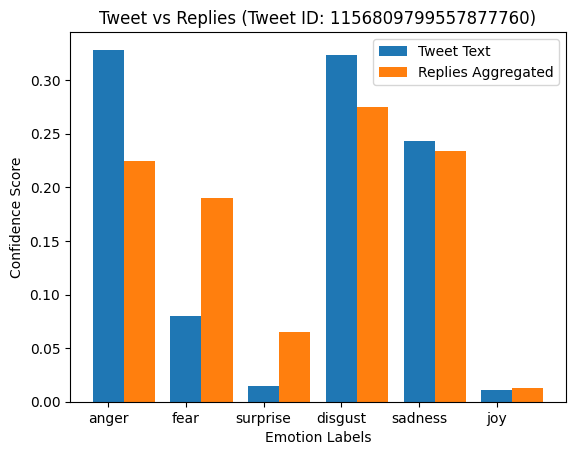

In [65]:
example_tweet = tweets_df.iloc[10]
plot_distributions(example_tweet['tweet_distribution'], example_tweet['average_reply_distribution'], example_tweet['conversation_id'])

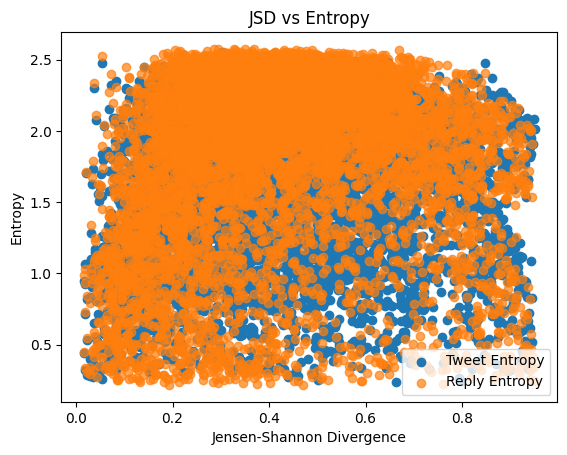

In [66]:
# Scatter plot: JSD vs. Entropy
plt.scatter(tweets_df['jsd'], tweets_df['tweet_entropy'], label='Tweet Entropy')
plt.scatter(tweets_df['jsd'], tweets_df['reply_entropy'], label='Reply Entropy', alpha=0.7)
plt.xlabel('Jensen-Shannon Divergence')
plt.ylabel('Entropy')
plt.title('JSD vs Entropy')
plt.legend()
plt.show()


In [13]:
grouped_replies = replies_df.groupby('conversation_id')


In [14]:
from itertools import combinations
import numpy as np

def pairwise_jsd(distributions):
    # Compute all pairwise JSD between distributions
    jsd_values = []
    for dist1, dist2 in combinations(distributions, 2):
        jsd = jensenshannon(list(dist1.values()), list(dist2.values()), base=2)
        jsd_values.append(jsd)
    return jsd_values

# Calculate pairwise JSD for replies of each tweet
reply_divergence = {}

for tweet_id, group in grouped_replies:
    reply_distributions = group['label_distribution'].tolist()
    jsd_values = pairwise_jsd(reply_distributions)
    reply_divergence[tweet_id] = {
        "mean_jsd": np.mean(jsd_values) if jsd_values else 0,
        "max_jsd": max(jsd_values) if jsd_values else 0,
        "pairwise_jsd": jsd_values
    }

# Convert to DataFrame for easier analysis
divergence_df = pd.DataFrame.from_dict(reply_divergence, orient='index')
divergence_df.reset_index(inplace=True)
divergence_df.rename(columns={"index": "conversation_id"}, inplace=True)


In [15]:
divergence_df.to_csv("/work/ptyagi/masterthesis/data/predictions/aug/divergence.csv", index=False)

In [16]:
high_divergence_tweets = divergence_df[divergence_df['mean_jsd'] > 0.7]


In [17]:
high_divergence_tweets.head()

conversation_id  mean_jsd   max_jsd          pairwise_jsd
52   1156845060081815552  0.907660  0.907660  [0.9076601819021495]
60   1156852677080489984  0.806014  0.806014  [0.8060139340567232]
65   1156863710834692097  0.942465  0.942465  [0.9424651867268812]
127  1156920771849138176  0.908798  0.908798  [0.9087977936006385]
130  1156922246008623104  0.730993  0.730993  [0.7309933564271686]

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(jsd_values, reply_ids):
    heatmap_data = np.zeros((len(reply_ids), len(reply_ids)))
    idx = 0
    for i in range(len(reply_ids)):
        for j in range(i + 1, len(reply_ids)):
            heatmap_data[i, j] = jsd_values[idx]
            heatmap_data[j, i] = jsd_values[idx]
            idx += 1

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, xticklabels=reply_ids, yticklabels=reply_ids, annot=True, cmap="coolwarm", cbar=True)
    plt.title("Pairwise JSD Heatmap for Replies")
    plt.xlabel("Replies")
    plt.ylabel("Replies")
    plt.show()


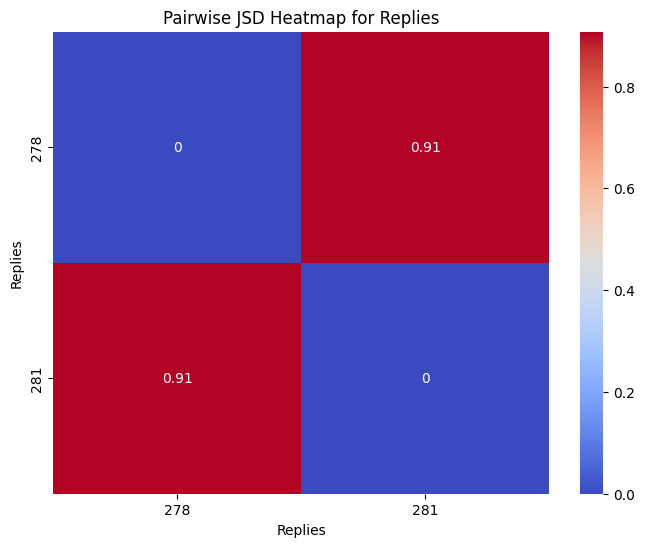

In [68]:
example_tweet_id = high_divergence_tweets.iloc[0]['conversation_id']
example_group = grouped_replies.get_group(example_tweet_id)
example_jsd = reply_divergence[example_tweet_id]['pairwise_jsd']

plot_heatmap(example_jsd, example_group.index.tolist())

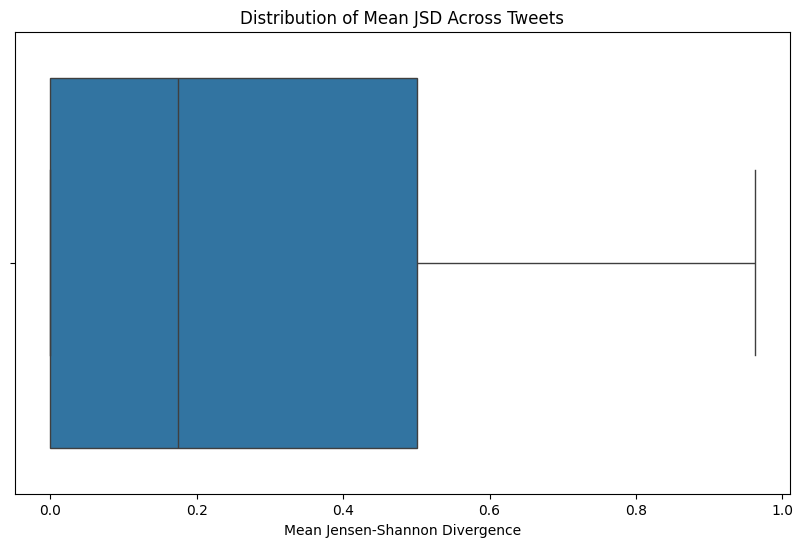

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=divergence_df, x='mean_jsd')
plt.title("Distribution of Mean JSD Across Tweets")
plt.xlabel("Mean Jensen-Shannon Divergence")
plt.show()


In [70]:
from PIL import Image

In [71]:
replies_df.query("conversation_id==1156920771849138176")

id      conversation_id                 created_at  \
738   1156959659607154692  1156920771849138176  2019-08-01 16:07:32+00:00   
1668  1157153907665068034  1156920771849138176  2019-08-02 04:59:25+00:00   

                                                replies  \
738                     moving to hit targets well done   
1668  yeah but the penalties for polluting corporati...   

                                             tweet_text tweet_lang  \
738   Protecting our #environment is the challenge o...         en   
1668  Protecting our #environment is the challenge o...         en   

      lang_confidence                          roberta-large-predictions  \
738           0.83717  [('joy', 0.8989329934120178), ('optimism', 0.8...   
1668          0.83717  [('disgust', 0.9930794835090637), ('anger', 0....   

                                     mapped_predictions  \
738   [('anger', 0.011657641453497257), ('fear', 0.0...   
1668  [('anger', 0.39385355523082566), ('fear', 0.06...   

                                     label_distribution  
738   {'anger': 0.011657641453497257, 'fear': 0.0062...  
1668  {'anger': 0.39385355523082566, 'fear': 0.06005...

In [72]:
tweets_df.query("conversation_id==1156920771849138176")

conversation_id                                         tweet_text  \
125  1156920771849138176  Protecting our #environment is the challenge o...   

                             roberta-large-predictions  \
125  [('optimism', 0.9930325746536255), ('joy', 0.6...   

                                  averaged_predictions  \
125  [('anger', 0.20275559834216145), ('fear', 0.03...   

                                    mapped_predictions  \
125  [('anger', 0.004462155819513656), ('fear', 0.0...   

     cosine_similarity_tweet_replies  \
125                          0.84024   

                                      clip_predictions  \
125  [('anger', 0.4219612), ('sadness', 0.23650247)...   

     cosine_similarity_clip_replies  cosine_similarity_clip_tweet  \
125                        0.595698                      0.166605   

    similarity_bin  ...                                 tweet_distribution  \
125          0-0.2  ...  {'anger': 0.004462155819513656, 'fear': 0.0693...   

                            average_reply_distribution  \
125  {'anger': 0.20275559834216145, 'fear': 0.03316...   

                                     clip_distribution  \
125  {'anger': 0.4219612, 'sadness': 0.23650247, 'd...   

                                       clip_tweet_dist       jsd  jsd_image  \
125  {'anger': 0.2132116779097568, 'fear': 0.064660...  0.473976   0.712082   

     jsd_multi  tweet_entropy  reply_entropy  multi_entropy  
125   0.189052       1.207045       2.141158       2.294473  

[1 rows x 21 columns]

In [73]:
tweets_df.query("conversation_id==1156920771849138176")["tweet_text"].iloc[0]

'Protecting our #environment is the challenge of our generation & it’s up to us to lead the fight against #climatechange🌎. Our investments:✅$ 1.3 billion to protect the natural spaces- largest in 🇨🇦 history✅Doubling the amount of protected #nature in Canada’s lands & oceans [URL]'

In [74]:
tweets_df.query("conversation_id==1156920771849138176")["tweet_distribution"].iloc[0]

{'anger': 0.004462155819513656,
 'fear': 0.06935277346300042,
 'surprise': 0.16795191716309782,
 'disgust': 0.006379027891933961,
 'sadness': 0.016971225195005376,
 'joy': 0.7348829004674488}

In [75]:
tweets_df.query("conversation_id==1156920771849138176")["average_reply_distribution"].iloc[0]

{'anger': 0.20275559834216145,
 'fear': 0.03316485124673468,
 'surprise': 0.07861650695157411,
 'disgust': 0.19945979118405366,
 'sadness': 0.05689038107538009,
 'joy': 0.429112871200096}

In [76]:
replies_df.query("conversation_id==1156920771849138176")["replies"].iloc[0]

'moving to hit targets well done'

In [77]:
replies_df.query("conversation_id==1156920771849138176")["label_distribution"].iloc[0]

{'anger': 0.011657641453497257,
 'fear': 0.0062767056010279145,
 'surprise': 0.13598812044518396,
 'disgust': 0.0024858818913319177,
 'sadness': 0.0017760067352554788,
 'joy': 0.8418156438737034}

In [78]:
replies_df.query("conversation_id==1156920771849138176")["replies"].iloc[1]

'yeah but the penalties for polluting corporations are still laughable govt looks away while watersheds and ecosystems are degraded'

In [79]:
replies_df.query("conversation_id==1156920771849138176")["label_distribution"].iloc[1]

{'anger': 0.39385355523082566,
 'fear': 0.06005299689244145,
 'surprise': 0.021244893457964254,
 'disgust': 0.3964337004767754,
 'sadness': 0.1120047554155047,
 'joy': 0.01641009852648852}

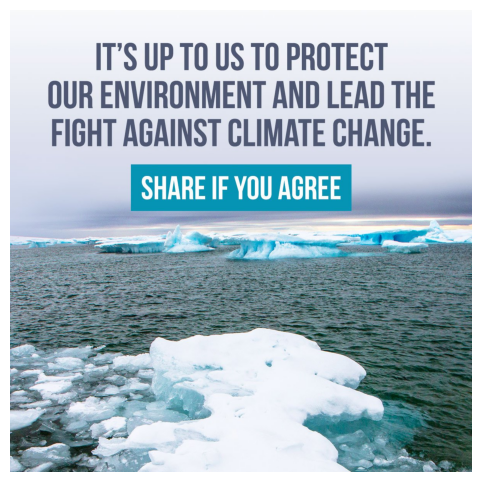

In [80]:
path = "/work/ptyagi/ClimateVisions/Images/2019/08_August/id_1156920771849138176_2019-08-01.jpg"
image = Image.open(path)

plt.figure(figsize=(6, 6))  # Adjust the size with figsize (width, height in inches)
plt.imshow(image)
plt.axis('off')
plt.show()

In [81]:
tweets_df.query("conversation_id==1156920771849138176")["clip_distribution"].iloc[0]

{'anger': 0.4219612,
 'sadness': 0.23650247,
 'disgust': 0.15490374,
 'surprise': 0.068113364,
 'fear': 0.059967887,
 'joy': 0.058551367}

In [82]:
high_jsd_images = tweets_df[tweets_df['jsd_image'] > 0.7]

In [34]:
high_jsd_images.reset_index(drop=True, inplace=True)


In [35]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_tweets(data, start_idx, end_idx, rows=2, cols=4):
    """
    Visualizes tweets and images for a specified index range.
    
    Parameters:
        data: DataFrame containing tweet information
        start_idx: Starting index of the range
        end_idx: Ending index of the range (exclusive)
        rows: Number of rows in the plot grid
        cols: Number of columns in the plot grid
    """
    batch_data = data.iloc[start_idx:end_idx]

    if batch_data.empty:
        print("No tweets found in the specified index range.")
        return

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()  # Flatten for easy indexing

    for i, (index, row) in enumerate(batch_data.iterrows()):
        print(row['conversation_id'])

        # Get tweet details
        tweet_text = row["tweet_text"]
        tweet_distribution = row["tweet_distribution"]
        clip_distribution = row["clip_distribution"]
        image_path = f'/work/ptyagi/ClimateVisions/Images/2019/08_August/{row["matched_filename"]}'

        try:
            image = Image.open(image_path)
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(f"Tweet ID: {row['conversation_id']}", fontsize=8)
        except FileNotFoundError:
            print(f"Image not found for conversation_id: {row['conversation_id']}")
            axes[i].axis('off')
            axes[i].set_title("Image Not Found", fontsize=8)

        # Print details in console for analysis
        print(f"Tweet {i + 1}: {tweet_text}")
        print(f"Tweet Distribution: {tweet_distribution}")
        print(f"CLIP Distribution: {clip_distribution}")
        print("-" * 50)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Explicitly close the figure to release resources



1156795736568320000
Tweet 1: Recommended reading. Even the Ministry of Defence believes in climate change 😂[URL] [URL]
Tweet Distribution: {'anger': 0.005189486352157533, 'fear': 0.014966601205849937, 'surprise': 0.2801340973905641, 'disgust': 0.023901688079751328, 'sadness': 0.0026332832759056084, 'joy': 0.6731748436957715}
CLIP Distribution: {'disgust': 0.33180538, 'fear': 0.26097906, 'anger': 0.16339315, 'surprise': 0.14540184, 'joy': 0.05162233, 'sadness': 0.046798196}
--------------------------------------------------
1156805262558334976
Tweet 2: I recently signed up for [USER]'s newsletter Change is Hard & it's so good! I recommend it for those with climate change fatigue & inertia [URL] [URL]
Tweet Distribution: {'anger': 0.0025901554286769444, 'fear': 0.013119073933153359, 'surprise': 0.13581109685537657, 'disgust': 0.002570566477684768, 'sadness': 0.003542195646418299, 'joy': 0.84236691165869}
CLIP Distribution: {'anger': 0.40336943, 'fear': 0.23060447, 'sadness': 0.22412728, 

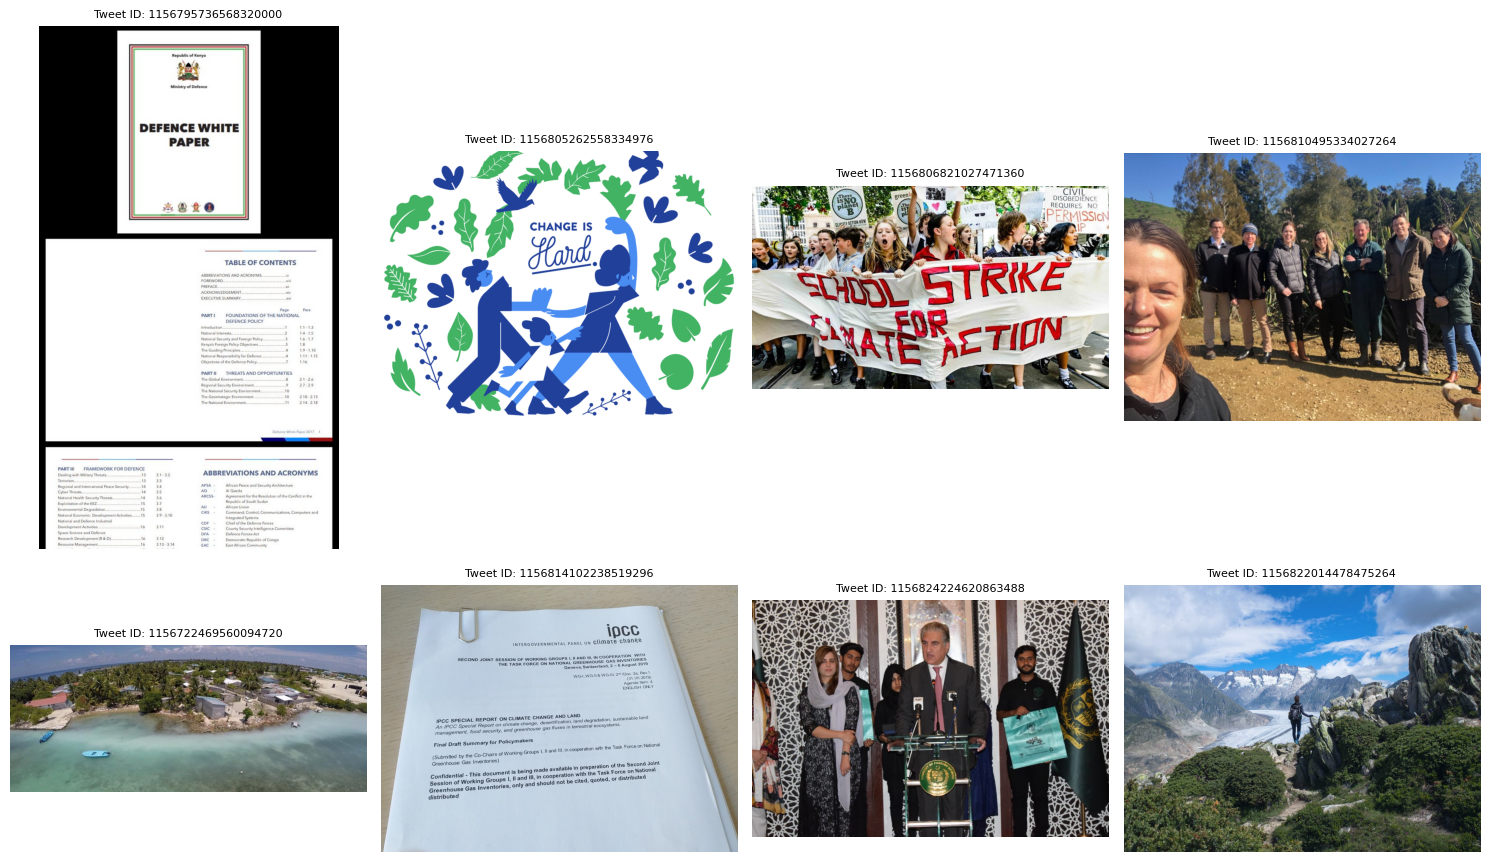

In [36]:
visualize_tweets(high_jsd_images, start_idx=0, end_idx=8)

In [37]:
low_jsd_images = tweets_df[tweets_df['jsd_image'] < 0.3]

In [38]:
low_jsd_images.reset_index(drop=True, inplace=True)

1157456089346138113
Tweet 1: climate change. it's real. it's here. it's now...#ResistanceStrong [URL]
Tweet Distribution: {'anger': 0.2804674231184336, 'fear': 0.2252321866830963, 'surprise': 0.07789926080750675, 'disgust': 0.14750923604037788, 'sadness': 0.06190207257605061, 'joy': 0.20698982077453487}
CLIP Distribution: {'anger': 0.3049197, 'surprise': 0.29956144, 'sadness': 0.12824021, 'disgust': 0.1203471, 'fear': 0.096190296, 'joy': 0.050741248}
--------------------------------------------------
1157494270393065474
Tweet 2: Russia wildfires linked to climate change, claims meteorologist [URL] [URL]
Tweet Distribution: {'anger': 0.1391141587116595, 'fear': 0.2584149881312743, 'surprise': 0.14562880206281448, 'disgust': 0.19355437570636813, 'sadness': 0.25169955789625537, 'joy': 0.011588117491628221}
CLIP Distribution: {'anger': 0.30066767, 'fear': 0.27267683, 'disgust': 0.14705281, 'sadness': 0.13585903, 'surprise': 0.0854352, 'joy': 0.05830849}
------------------------------------

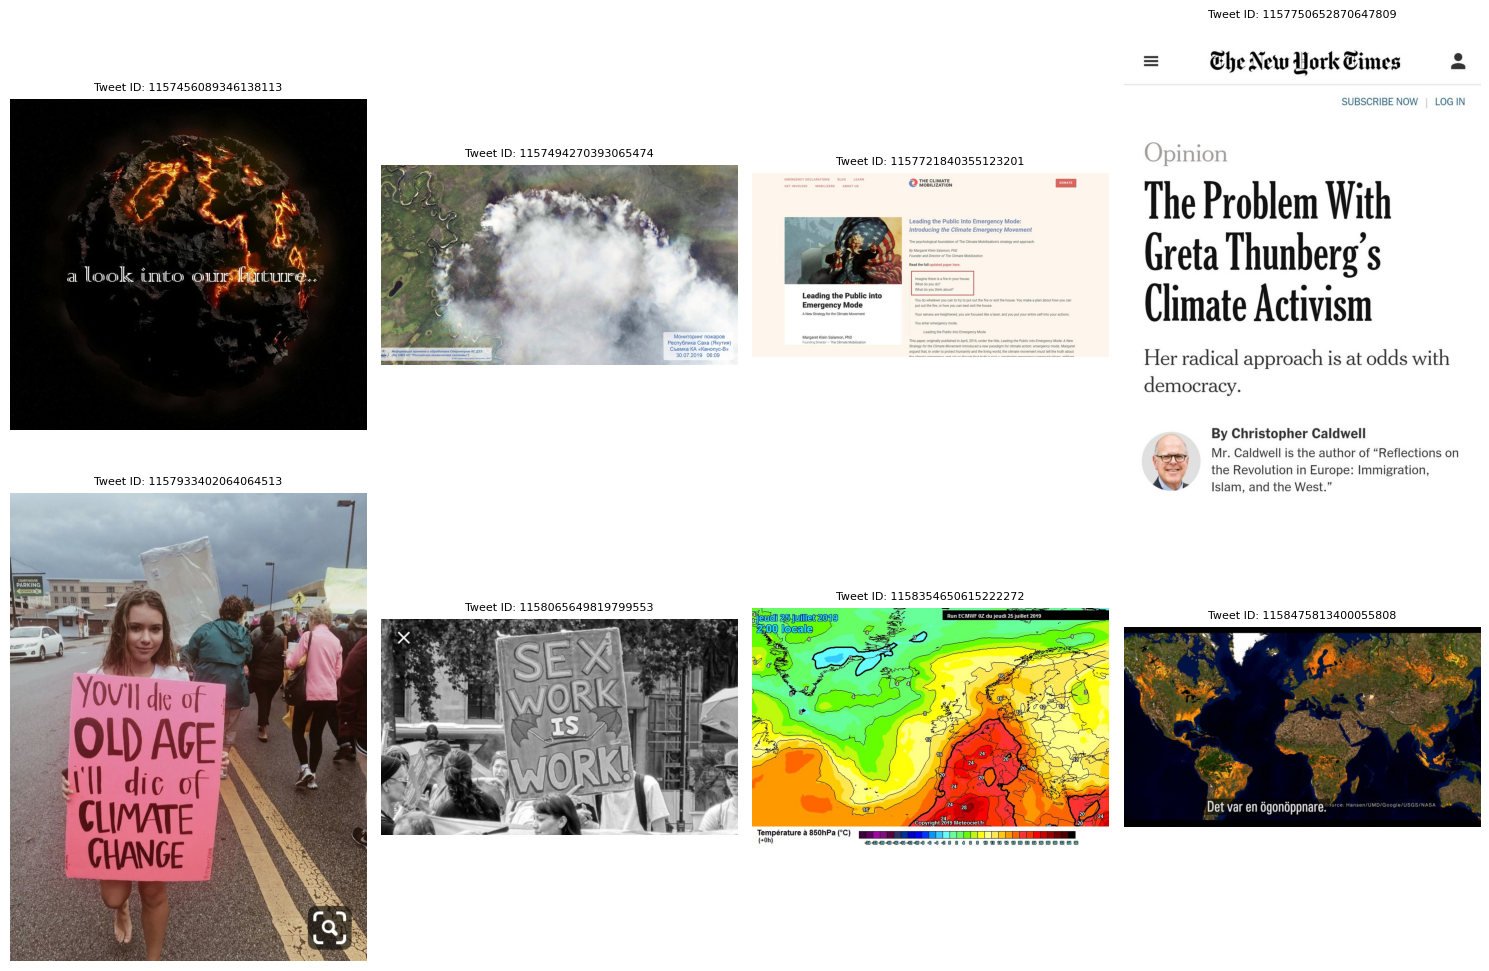

In [39]:
visualize_tweets(low_jsd_images, start_idx=16, end_idx=24)

In [84]:
high_jsd_images.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 5 to 7342
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   conversation_id                  2627 non-null   int64  
 1   tweet_text                       2627 non-null   object 
 2   roberta-large-predictions        2627 non-null   object 
 3   averaged_predictions             2627 non-null   object 
 4   mapped_predictions               2627 non-null   object 
 5   cosine_similarity_tweet_replies  2627 non-null   float64
 6   clip_predictions                 2627 non-null   object 
 7   cosine_similarity_clip_replies   2627 non-null   float64
 8   cosine_similarity_clip_tweet     2627 non-null   float64
 9   similarity_bin                   2627 non-null   object 
 10  matched_filename                 2627 non-null   object 
 11  tweet_distribution               2627 non-null   object 
 12  average_reply_distributio

In [85]:
high_jsd_mutli = tweets_df[tweets_df['jsd_multi'] > 0.7]

In [86]:
high_jsd_mutli.reset_index(drop=True, inplace=True)


In [88]:
high_jsd_mutli.head()

conversation_id                                         tweet_text  \
0  1156786644906840064  ICYMI: Trump Slaps #Tariffs on Solar Panels in...   
1  1156881353100673024  Who else watched the #DemocraticDebate2020 las...   
2  1157032485005549580  July was world's hottest month on record, WMO ...   
3  1157056961285775362           Climate change is back at it again [URL]   
4  1156784896477716480  #WhereAreTheScientists This meeting is not wha...   

                           roberta-large-predictions  \
0  [('anger', 0.8689755201339722), ('disgust', 0....   
1  [('anticipation', 0.867686927318573), ('joy', ...   
2  [('fear', 0.9437539577484131), ('sadness', 0.5...   
3  [('disgust', 0.6320368051528931), ('fear', 0.5...   
4  [('disgust', 0.7985260486602783), ('anger', 0....   

                                averaged_predictions  \
0  [('anger', 0.008867843414662797), ('fear', 0.0...   
1  [('anger', 0.005194762535702497), ('fear', 0.0...   
2  [('anger', 0.006892342248936359), ('fear', 0.0...   
3  [('anger', 0.02468331708137961), ('fear', 0.01...   
4  [('anger', 0.008604342345364549), ('fear', 0.0...   

                                  mapped_predictions  \
0  [('anger', 0.4027862404695535), ('fear', 0.023...   
1  [('anger', 0.009635067387662559), ('fear', 0.0...   
2  [('anger', 0.10642376091908227), ('fear', 0.41...   
3  [('anger', 0.1561575189995659), ('fear', 0.320...   
4  [('anger', 0.262108849042721), ('fear', 0.0740...   

   cosine_similarity_tweet_replies  \
0                         0.082587   
1                         0.567587   
2                         0.073803   
3                         0.183987   
4                         0.124288   

                                    clip_predictions  \
0  [('anger', 0.5647884), ('fear', 0.17118351), (...   
1  [('anger', 0.5386616), ('sadness', 0.28040648)...   
2  [('anger', 0.39448687), ('sadness', 0.2672087)...   
3  [('anger', 0.45165047), ('sadness', 0.19051035...   
4  [('anger', 0.2860556), ('sadness', 0.23199546)...   

   cosine_similarity_clip_replies  cosine_similarity_clip_tweet  \
0                        0.183566                      0.784000   
1                        0.012847                      0.151038   
2                        0.151868                      0.688883   
3                        0.185815                      0.634463   
4                        0.228759                      0.752871   

  similarity_bin  ...                                 tweet_distribution  \
0        0.6-0.8  ...  {'anger': 0.4027862404695535, 'fear': 0.023168...   
1          0-0.2  ...  {'anger': 0.009635067387662559, 'fear': 0.0314...   
2        0.6-0.8  ...  {'anger': 0.10642376091908227, 'fear': 0.41738...   
3        0.6-0.8  ...  {'anger': 0.1561575189995659, 'fear': 0.320063...   
4        0.6-0.8  ...  {'anger': 0.262108849042721, 'fear': 0.0740542...   

                          average_reply_distribution  \
0  {'anger': 0.008867843414662797, 'fear': 0.0613...   
1  {'anger': 0.005194762535702497, 'fear': 0.0074...   
2  {'anger': 0.006892342248936359, 'fear': 0.0101...   
3  {'anger': 0.02468331708137961, 'fear': 0.01647...   
4  {'anger': 0.008604342345364549, 'fear': 0.0060...   

                                   clip_distribution  \
0  {'anger': 0.5647884, 'fear': 0.17118351, 'disg...   
1  {'anger': 0.5386616, 'sadness': 0.28040648, 'f...   
2  {'anger': 0.39448687, 'sadness': 0.2672087, 'f...   
3  {'anger': 0.45165047, 'sadness': 0.19051035, '...   
4  {'anger': 0.2860556, 'sadness': 0.23199546, 's...   

                                     clip_tweet_dist       jsd  jsd_image  \
0  {'anger': 0.4837873202347768, 'fear': 0.097175...  0.821631   0.388699   
1  {'anger': 0.27414833369383124, 'fear': 0.04700...  0.603498   0.797857   
2  {'anger': 0.25045531545954114, 'fear': 0.28713...  0.871387   0.390662   
3  {'anger': 0.30390399449978295, 'fear': 0.24033...  0.756533   0.338087   
4  {'anger': 0.27408222452136055, 'fear': 0.1056

In [89]:
from scipy.spatial.distance import cosine

def calculate_cosine_similarity(row):
    dist_1 = row['average_reply_distribution']
    dist_2 = row['clip_tweet_dist']
    
    keys = sorted(dist_1.keys())
    vector_1 = [dist_1[key] for key in keys]
    vector_2 = [dist_2[key] for key in keys]
    
    return 1 - cosine(vector_1, vector_2)


In [91]:
tweets_df['cosine_similarity_multi'] = tweets_df.apply(calculate_cosine_similarity, axis=1)

In [93]:
tweets_df.head()

conversation_id                                         tweet_text  \
0  1156745986548670465  Quote of the night? Gillibrand gets laughs say...   
1  1156756706296238081  Is climate change a massive hoax or not?  Whic...   
2  1156782989344251904  Hottest month ever: June 2019 was recorded as ...   
3  1156786644906840064  ICYMI: Trump Slaps #Tariffs on Solar Panels in...   
4  1156793069435572225  When i was young i used to see butterflies eve...   

                           roberta-large-predictions  \
0  [('anticipation', 0.6186065077781677), ('fear'...   
1  [('anticipation', 0.679983913898468), ('surpri...   
2  [('fear', 0.706391453742981), ('anger', 0.2220...   
3  [('anger', 0.8689755201339722), ('disgust', 0....   
4  [('sadness', 0.9452576041221619), ('fear', 0.8...   

                                averaged_predictions  \
0  [('anger', 0.16990943452855908), ('fear', 0.05...   
1  [('anger', 0.2943476886939764), ('fear', 0.109...   
2  [('anger', 0.025321945604377914), ('fear', 0.1...   
3  [('anger', 0.008867843414662797), ('fear', 0.0...   
4  [('anger', 0.01091247527479495), ('fear', 0.12...   

                                  mapped_predictions  \
0  [('anger', 0.012048927230430958), ('fear', 0.2...   
1  [('anger', 0.03949322766488157), ('fear', 0.09...   
2  [('anger', 0.11455001581186203), ('fear', 0.38...   
3  [('anger', 0.4027862404695535), ('fear', 0.023...   
4  [('anger', 0.011271691272930396), ('fear', 0.4...   

   cosine_similarity_tweet_replies  \
0                         0.809521   
1                         0.238486   
2                         0.650414   
3                         0.082587   
4                         0.700972   

                                    clip_predictions  \
0  [('disgust', 0.30397248), ('fear', 0.25486195)...   
1  [('anger', 0.28693756), ('fear', 0.18922445), ...   
2  [('fear', 0.81379455), ('surprise', 0.05587873...   
3  [('anger', 0.5647884), ('fear', 0.17118351), (...   
4  [('fear', 0.41976), ('sadness', 0.22444683), (...   

   cosine_similarity_clip_replies  cosine_similarity_clip_tweet  \
0                        0.771768                      0.647942   
1                        0.748564                      0.529061   
2                        0.303197                      0.860183   
3                        0.183566                      0.784000   
4                        0.589017                      0.921277   

  similarity_bin  ...                         average_reply_distribution  \
0        0.6-0.8  ...  {'anger': 0.16990943452855908, 'fear': 0.05985...   
1        0.4-0.6  ...  {'anger': 0.2943476886939764, 'fear': 0.109163...   
2        0.8-1.0  ...  {'anger': 0.025321945604377914, 'fear': 0.1251...   
3        0.6-0.8  ...  {'anger': 0.008867843414662797, 'fear': 0.0613...   
4        0.8-1.0  ...  {'anger': 0.01091247527479495, 'fear': 0.12397...   

                                   clip_distribution  \
0  {'disgust': 0.30397248, 'fear': 0.25486195, 'a...   
1  {'anger': 0.28693756, 'fear': 0.18922445, 'sur...   
2  {'fear': 0.81379455, 'surprise': 0.055878732, ...   
3  {'anger': 0.5647884, 'fear': 0.17118351, 'disg...   
4  {'fear': 0.41976, 'sadness': 0.22444683, 'ange...   

                                     clip_tweet_dist       jsd jsd_image  \
0  {'anger': 0.11670482861521549, 'fear': 0.25480...  0.394924  0.489645   
1  {'anger': 0.16321539383244077, 'fear': 0.14451...  0.700589  0.472363   
2  {'anger': 0.07178915290593102, 'fear': 0.59777...  0.414283  0.630855   
3  {'anger': 0.4837873202347768, 'fear': 0.097175...  0.821631  0.388699   
4  {'anger': 0.0933283306364652, 'fear': 0.428222...  0.405718  0.549466   

   jsd_multi  tweet_entropy  reply_entropy  multi_entropy  \
0   0.270344       2.015008       2.423982       2.348826   
1   0.545506       1.764798       1.999899       2.368556   
2   0.520306       2.371642       1.968250       1.890609   
3   0.753946       1.864199       1.318870       2.067231   
4   0.45

In [94]:
tweets_df.to_csv("/work/ptyagi/masterthesis/data/predictions/aug/analysis_metrics.csv")

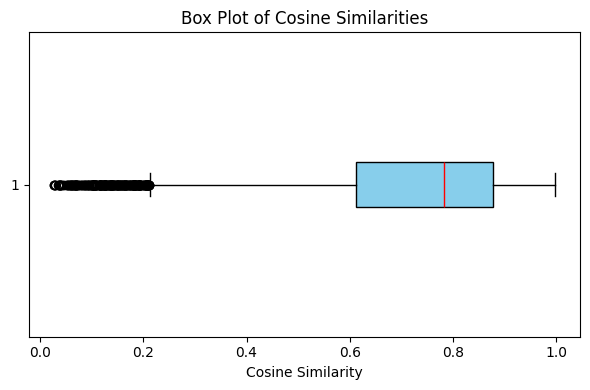

In [96]:
plt.figure(figsize=(6, 4))
plt.boxplot(tweets_df['cosine_similarity_multi'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.tight_layout()
plt.show()